# Assignment 1: Color Spaces, Morphological Operators

## Exercise 1.1

For an image of your choice, implement the simple binarization method as shown in the lecture. We've put some example images in in /images.

Rough sketch:

1. define the „positive“ subspace P in the RGB cube
2. iterate over all pixels in I and check if in P or ~P
3. write result to new image
4. play around with size and shape of P and display binary image (**RESULT**)



In [1]:
%matplotlib inline 
from PIL import Image
from skimage import img_as_ubyte
import cv2
from skimage import io, data, color
import numpy as np
from matplotlib import pyplot as plt

C:\Users\prol-\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


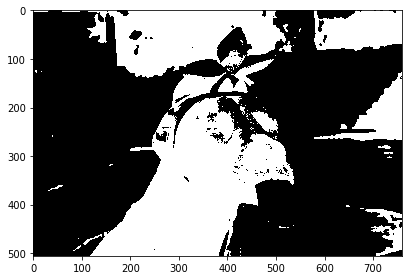

In [2]:
start = np.array([0,0,0])
end = np.array([210,180,140])
image = io.imread('dog.jpg')
binary_result = np.zeros((image.shape[0], image.shape[1]))

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
            pixel_color=image[i][j]
            if pixel_color[0] >= start[0] and pixel_color[0] <= end[0]:
                if pixel_color[1] >= start[1] and pixel_color[1] <= end[1]:
                    if pixel_color[2] >= start[2] and pixel_color[2] <= end[2]:
                        binary_result[i][j] = 1
                    
img = img_as_ubyte(binary_result)
io.imshow(binary_result)

## Exercise 1.2

* starting from the binary color detection image
* erase noise with an erosion operation
* dilate once to get original size of object
* find connected components with the two-pass algorithm
* extract bounding box on the fly
* draw bounding box on original image (**RESULT**)

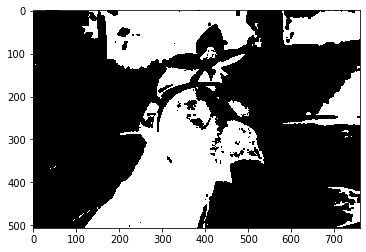

In [3]:
# erosion
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(binary_result, kernel, iterations=1)
plt.imshow(erosion, cmap='gray') 
plt.show()

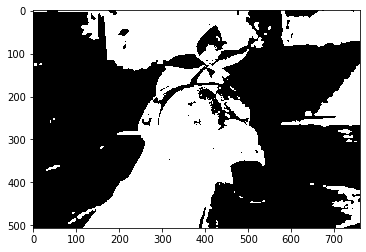

In [4]:
# dilation
dilation = cv2.dilate(binary_result, kernel, iterations=1) 
plt.imshow(dilation, cmap='gray') 
plt.show()

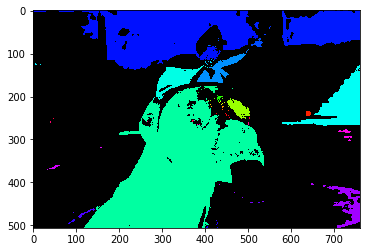

In [5]:
# finding connected components using cv2
ret, labels = cv2.connectedComponents(img)
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0
plt.imshow(labeled_img)
plt.show()

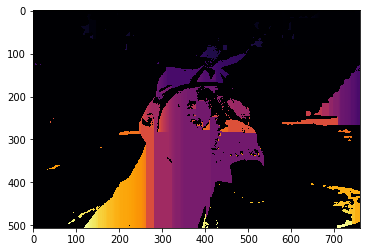

In [11]:
# two-pass algorithm
labels = np.zeros(np.shape(img))
nextlabel = 1
eqlist = []
# first pass
for i in range(np.shape(img)[0]):
    for j in range(np.shape(img)[1]):
        if img[i][j] != 0:
            if i and j != 0:
                if img[i-1][j] == 0 and img[i][j-1] == 0:
                    labels[i][j] = nextlabel
                    eqlist.append(nextlabel)
                    nextlabel += 1
                elif img[i-1][j] == 0:
                    labels[i][j] = labels[i][j-1]
                elif img[i][j-1] == 0:
                    labels[i][j] = labels[i-1][j]
                else:
                    labels[i][j] = min(labels[i-1][j], labels[i][j-1])
                    eqlist[int(max(labels[i-1][j], labels[i][j-1]))-1] = min(labels[i-1][j], labels[i][j-1])
            elif i == 0:
                if img[i][j-1] == 0:
                    labels[i][j] = nextlabel
                    eqlist.append(nextlabel)
                    nextlabel += 1
                else:
                    labels[i][j] = labels[i][j-1]
            else:
                if img[i-1][j] == 0:
                    labels[i][j] = nextlabel
                    eqlist.append(nextlabel)
                    nextlabel += 1
                else:
                    labels[i][j] = labels[i-1][j]
plt.imshow(labels, cmap='inferno')
plt.show()

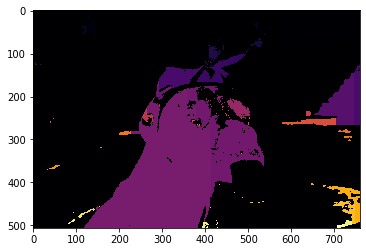

In [12]:
# second pass
eqtuple = tuple(eqlist)
for i in range(len(eqtuple)-1, 0, -1):
    if eqtuple[i] != i+1:
        labels[np.where(labels==i+1)] = eqtuple[i]
plt.imshow(labels, cmap='inferno')
plt.show()

245


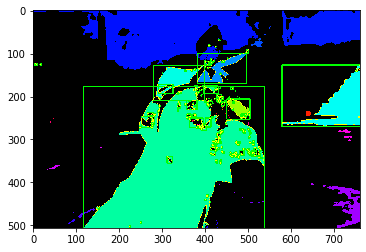

In [6]:
# bounding box
img = labeled_img
ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                127, 255, cv2.THRESH_BINARY)
contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
print(len(contours))
cv2.drawContours(img, contours, -1, (255, 255, 0), 1)
plt.imshow(img)
plt.show()

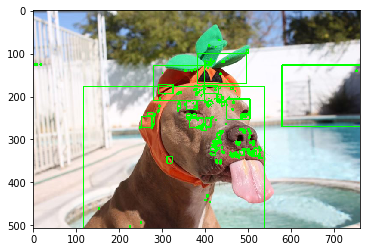

In [7]:
# result
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(image)
plt.show()

## Exercise 1.3

* use your color detection and connected components algorithm
* implement simplest tracking algorithm
* draw history of all previous points on frame (**RESULT**)

(see images/racecar or images/taco for sample image sequences)